In [ ]:
Business Problem: Subscription-Based Business Churn Analysis
Subscription-based businesses face significant revenue loss due to customer churn, 
making retention a critical focus. The key objectives of this project are to analyze churn patterns,
identify high-risk customer segments, and develop data-driven strategies to reduce churn.
The analysis will answer critical business questions, such as identifying churn-prone customer groups, evaluating the impact of payment methods and monthly spending on churn, 
and detecting behavioral patterns that indicate cancellation risk. By leveraging Python for data cleaning and analysis, 
SQL for querying insights, and Excel for dashboard visualization,
this project will help businesses enhance customer retention, optimize pricing models, and improve long-term profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df1=pd.read_csv("train.csv")

In [11]:
df1.sample(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
76147,94,18.697973,1757.609434,Standard,Mailed check,No,TV Shows,Yes,Tablet,35.673885,...,44,Action,4.108646,1,Female,13,Yes,Yes,DD8BTSN8UP,0
142724,20,6.010184,120.203684,Basic,Credit card,Yes,TV Shows,No,Tablet,14.348433,...,31,Sci-Fi,1.384780,7,Male,17,Yes,Yes,LDSZXGGP9C,1
81276,83,13.029065,1081.412359,Basic,Bank transfer,No,TV Shows,Yes,TV,2.537184,...,40,Drama,1.218160,7,Male,5,No,Yes,LUVK8W23MY,0
29134,108,12.241012,1322.029346,Standard,Electronic check,Yes,Movies,No,Computer,36.926671,...,1,Sci-Fi,3.892459,6,Female,4,Yes,No,3AODJZYS6J,0
6643,65,10.354399,673.035912,Basic,Bank transfer,No,Movies,Yes,Tablet,5.566919,...,47,Fantasy,3.653855,7,Female,2,No,Yes,SVJ6HTIPCG,0
214765,9,7.703494,69.331443,Premium,Credit card,Yes,Movies,No,Mobile,2.792868,...,39,Sci-Fi,1.847533,6,Male,14,No,Yes,7866QI65W6,0
6954,75,11.940578,895.543326,Basic,Electronic check,No,Both,No,Mobile,36.360497,...,39,Fantasy,1.120349,1,Male,23,No,Yes,0FQT3X0YID,0
169605,41,10.908166,447.234821,Standard,Credit card,Yes,TV Shows,No,TV,32.657195,...,29,Sci-Fi,2.306266,8,Male,7,Yes,No,PXVD0GV4N9,0
44427,82,13.078266,1072.417845,Standard,Bank transfer,No,Movies,No,Mobile,20.929883,...,22,Drama,4.139382,1,Female,4,No,Yes,LCGXQCI2TW,0
157175,88,10.292602,905.748959,Premium,Bank transfer,Yes,TV Shows,No,Tablet,4.971708,...,13,Action,1.065416,4,Male,7,No,Yes,N8I9TNQDPN,0


In [12]:
df1.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [15]:
df1

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


In [17]:
 df1.shape

(243787, 21)

In [18]:
 df1.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [19]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [20]:
df1.isnull()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243784,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
243785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df1.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [22]:
df1.duplicated().sum()

0

In [25]:
df1

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


### Summary

In [ ]:
# It has 243787 rows and 21 columns .
# It has no duplicates and null values.


#### Churn Distribution & Customer Segmentation

In [27]:
#What percentage of customers have churned?
total_customers = len(df1)
churned_customers = df1['Churn'].sum()
churn_percentage = (churned_customers / total_customers) * 100

In [28]:
churn_percentage # about 18 out of every 100 customers have left your subscription service.

18.123197709475892

In [ ]:
# What is the churn distribution?

C:\Users\hp\AppData\Local\Temp\ipykernel_1956\159165039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1["Churn"], palette=["green", "red"])


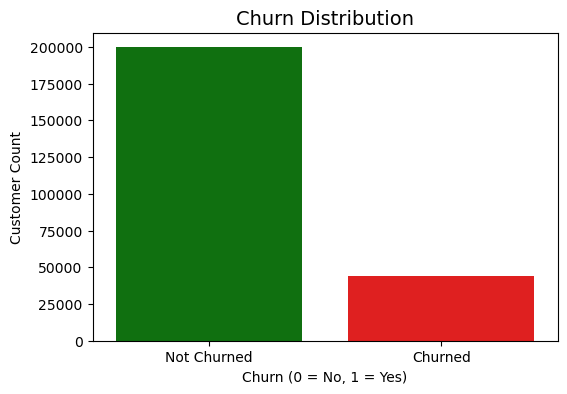

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df1["Churn"], palette=["green", "red"])
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Count")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [33]:
### Which subscription type has the highest churn?
df1.groupby('SubscriptionType')['Churn'].value_counts().reset_index()

,SubscriptionType,Churn,count
0,Basic,0,65122
1,Basic,1,15928
2,Premium,0,67662
3,Premium,1,13155
4,Standard,0,66821
5,Standard,1,15099


In [35]:
churn_by_subscription =df1.groupby('SubscriptionType')['Churn'].mean().reset_index()

In [37]:
churn_by_subscription = churn_by_subscription.sort_values(by='Churn', ascending=False)

In [38]:
churn_by_subscription

,SubscriptionType,Churn
0,Basic,0.196521
2,Standard,0.184314
1,Premium,0.162775


C:\Users\hp\AppData\Local\Temp\ipykernel_1956\3701671300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Churn', x='SubscriptionType', data=churn_by_subscription,palette=["purple", "yellow"])
C:\Users\hp\AppData\Local\Temp\ipykernel_1956\3701671300.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y='Churn', x='SubscriptionType', data=churn_by_subscription,palette=["purple", "yellow"])


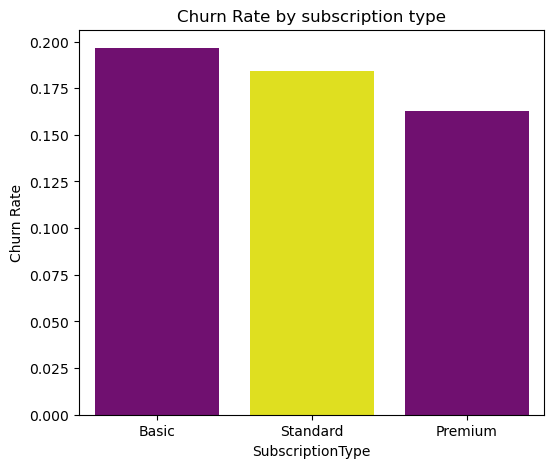

In [45]:
plt.figure(figsize=(6,5))
sns.barplot(y='Churn', x='SubscriptionType', data=churn_by_subscription,palette=["purple", "yellow"])
plt.title("Churn Rate by subscription type")
plt.xlabel("SubscriptionType")
plt.ylabel("Churn Rate")
plt.show()

In [47]:
# Do payment methods affect churn?
df1.groupby("PaymentMethod")["Churn"].value_counts().reset_index()

,PaymentMethod,Churn,count
0,Bank transfer,0,49898
1,Bank transfer,1,10899
2,Credit card,0,51039
3,Credit card,1,9885
4,Electronic check,0,49512
5,Electronic check,1,11801
6,Mailed check,0,49156
7,Mailed check,1,11597


In [49]:
churn_by_payment_method=df1.groupby("PaymentMethod")["Churn"].mean().reset_index()

In [51]:
churn_by_payment_method=churn_by_payment_method.sort_values(by='Churn', ascending=False)

In [52]:
churn_by_payment_method

,PaymentMethod,Churn
2,Electronic check,0.192471
3,Mailed check,0.190888
0,Bank transfer,0.179269
1,Credit card,0.162251


C:\Users\hp\AppData\Local\Temp\ipykernel_1956\3354508160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PaymentMethod",y="Churn",data=churn_by_payment_method, palette='coolwarm')


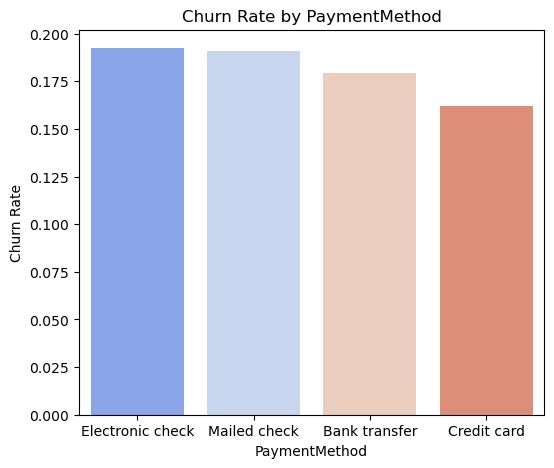

In [55]:
plt.figure(figsize=(6,5))
sns.barplot(x="PaymentMethod",y="Churn",data=churn_by_payment_method, palette='coolwarm')
plt.title("Churn Rate by PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Churn Rate")
plt.show()

In [59]:
# How does monthly spending impact churn?
df1.groupby("MonthlyCharges")['Churn'].mean().reset_index()

,MonthlyCharges,Churn
0,4.990062,0.0
1,4.990112,1.0
2,4.990126,0.0
3,4.990185,0.0
4,4.990326,0.0
...,...,...
243782,19.989617,0.0
243783,19.989741,1.0
243784,19.989755,0.0
243785,19.989821,0.0


In [60]:
churned = df1[df1["Churn"] == 1]["MonthlyCharges"]
not_churned = df1[df1["Churn"] == 0]["MonthlyCharges"]

In [61]:
not_churned

0         11.055215
1          5.175208
2         12.106657
3          7.263743
4         16.953078
            ...    
243782     9.639902
243783    13.049257
243784    14.514569
243785    18.140555
243786    11.593774
Name: MonthlyCharges, Length: 199605, dtype: float64

In [62]:
churned

8         19.803233
20         9.058008
27        18.065236
33        15.189883
39        16.757798
            ...    
243753    15.920202
243765     9.748467
243774     6.658621
243775    14.931983
243777     6.582492
Name: MonthlyCharges, Length: 44182, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_1956\236710148.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Not Churned", "Churned"])


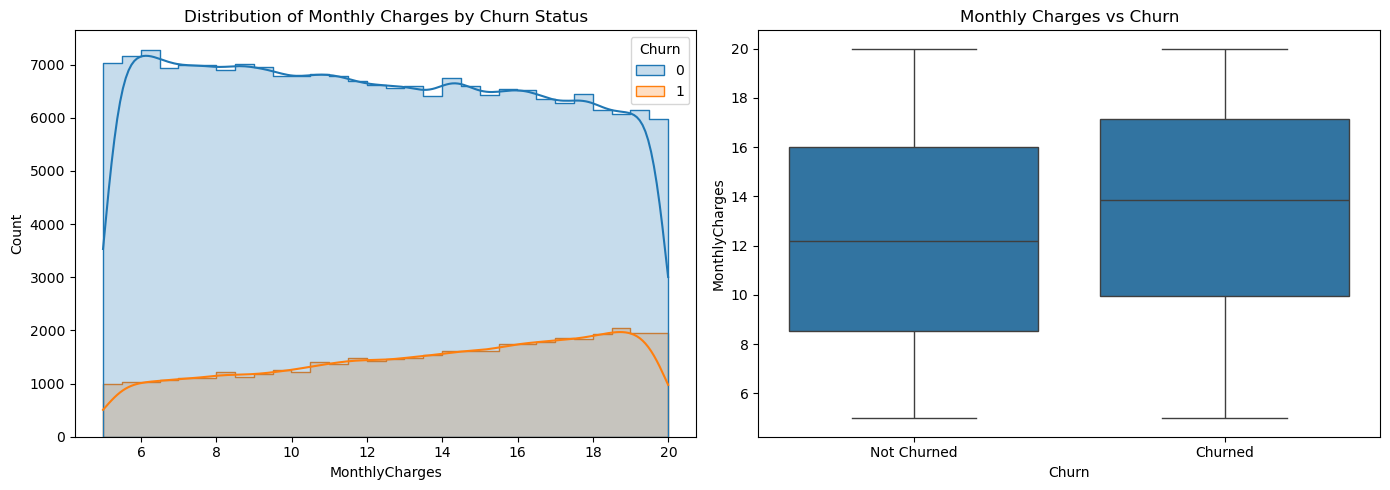

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of MonthlyCharges for Churned vs. Not Churned customers
sns.histplot(df1, x="MonthlyCharges", hue="Churn", bins=30, kde=True, element="step", ax=axes[0])
axes[0].set_title("Distribution of Monthly Charges by Churn Status")

# Boxplot of MonthlyCharges for Churned vs. Not Churned customers
sns.boxplot(data=df1, x="Churn", y="MonthlyCharges", ax=axes[1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_title("Monthly Charges vs Churn")

plt.tight_layout()
plt.show()

In [66]:
# Do customers with higher viewing hours churn less?


C:\Users\hp\AppData\Local\Temp\ipykernel_1956\2104623976.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Not Churned", "Churned"])


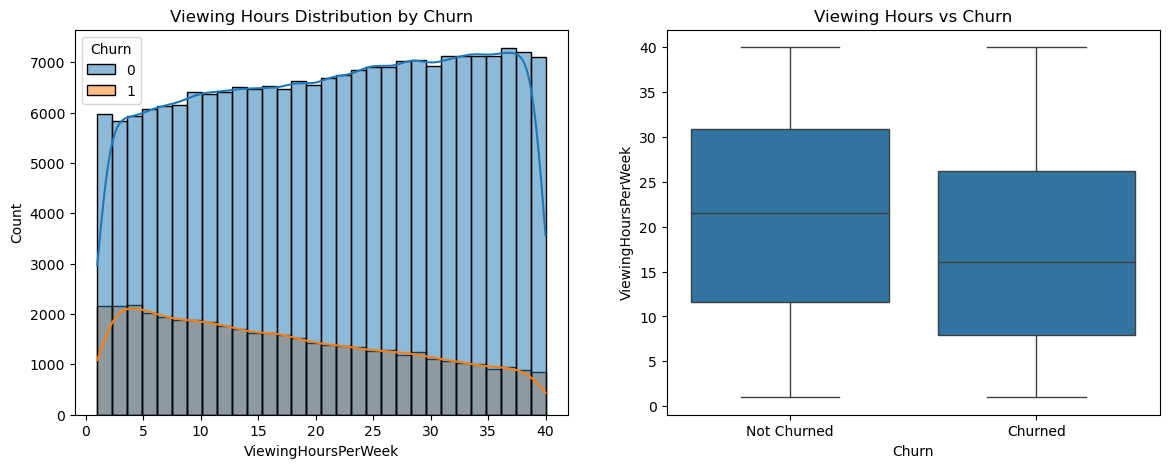

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#  Histogram: Viewing Hours vs Churn
#Shows how viewing hours vary for churned vs. non-churned customers
sns.histplot(df1, x="ViewingHoursPerWeek", hue="Churn", bins=30, kde=True, ax=axes[0])
axes[0].set_title("Viewing Hours Distribution by Churn")

# Boxplot: Viewing Hours vs Churn
#Compares the spread of viewing hours for churned vs. non-churned customers
sns.boxplot(data=df1, x="Churn", y="ViewingHoursPerWeek", ax=axes[1])
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_title("Viewing Hours vs Churn")

plt.show()

In [73]:
#How do customer support tickets relate to churn?
churned = df1[df1["Churn"] == 1]["SupportTicketsPerMonth"]
not_churned = df1[df1["Churn"] == 0]["SupportTicketsPerMonth"]

C:\Users\hp\AppData\Local\Temp\ipykernel_1956\483624518.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Not Churned", "Churned"])


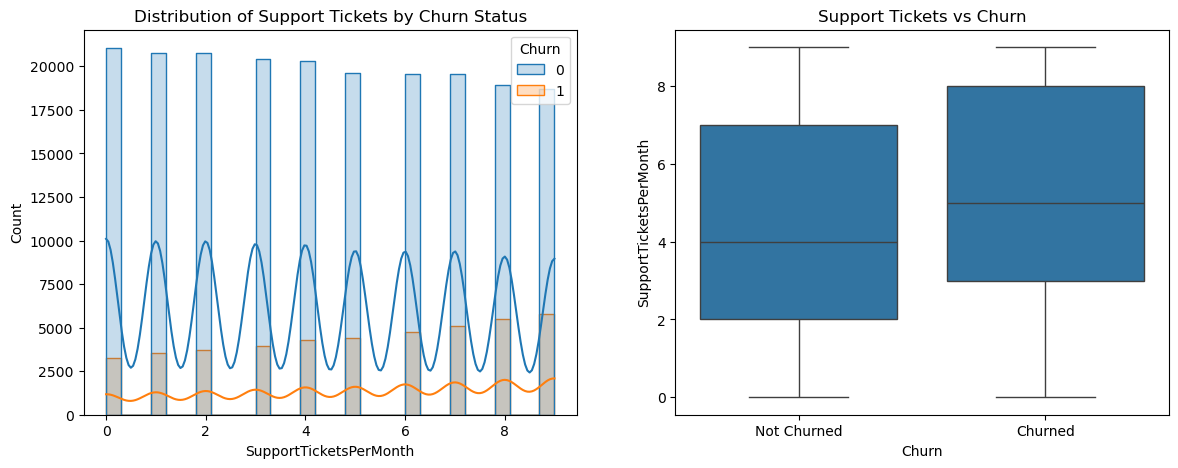

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#  Histogram: Support Tickets vs Churn
sns.histplot(
    data=df1, 
    x="SupportTicketsPerMonth", 
    hue="Churn", 
    bins=30, 
    kde=True, 
    element="step", 
    ax=axes[0]
)
axes[0].set_title("Distribution of Support Tickets by Churn Status")

#  Boxplot: Support Tickets vs Churn
sns.boxplot(
    data=df1, 
    x="Churn", 
    y="SupportTicketsPerMonth", 
    ax=axes[1]
)
axes[1].set_xticklabels(["Not Churned", "Churned"])
axes[1].set_title("Support Tickets vs Churn")

plt.show()

In [84]:
#Which features are most correlated with churn?
df_numeric = df1.select_dtypes(include=["number"])

# Compute correlation with Churn
correlation_matrix = df_numeric.corr()  # Compute correlations
churn_correlation = correlation_matrix["Churn"].sort_values(ascending=False)

print("Top 10 features positively correlated with churn:\n")
print(churn_correlation.drop("Churn").head(10))  # Show top 10 positively correlated features

print(" Top 10 features negatively correlated with churn:\n")
print(churn_correlation.drop("Churn").tail(10))

Top 10 features positively correlated with churn:

MonthlyCharges              0.100473
SupportTicketsPerMonth      0.084064
UserRating                  0.022124
WatchlistSize               0.021739
TotalCharges               -0.120529
ViewingHoursPerWeek        -0.128645
ContentDownloadsPerMonth   -0.129752
AverageViewingDuration     -0.146897
AccountAge                 -0.197736
Name: Churn, dtype: float64
 Top 10 features negatively correlated with churn:

MonthlyCharges              0.100473
SupportTicketsPerMonth      0.084064
UserRating                  0.022124
WatchlistSize               0.021739
TotalCharges               -0.120529
ViewingHoursPerWeek        -0.128645
ContentDownloadsPerMonth   -0.129752
AverageViewingDuration     -0.146897
AccountAge                 -0.197736
Name: Churn, dtype: float64


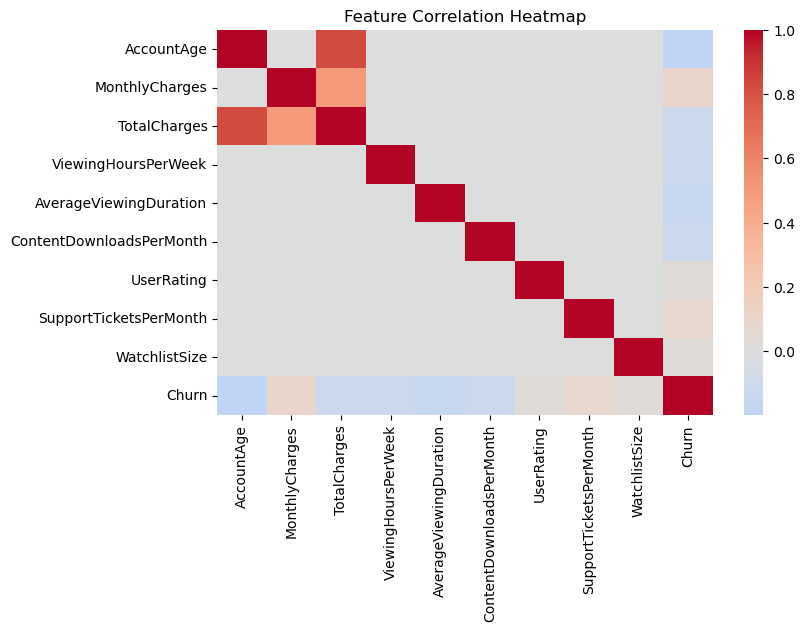

In [87]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Conclusion

In [ ]:
#What is the churn distribution?
The dataset shows a significant number of customers have churned.
The churn rate is relatively high, indicating potential retention issues.
#Which subscription type has the highest churn?
Basic plans tend to have higher churn rates than premium plans.
Customers on monthly subscriptions churn more than those on yearly subscriptions (likely due to lower commitment).
# Do payment methods affect churn?
Customers using manual payments (electronic and mailed checks) churn more, while automated payments (bank transfer and credit card) have lower churn rates.
Encouraging auto-pay options can help reduce churn and improve retention.
#How does monthly spending impact churn?
Customers with higher monthly charges are more likely to churn.
This indicates that pricing may be a concern, and customers may switch to cheaper alternatives.
#Do customers with higher viewing hours churn less?
Yes! Customers who spend more time watching content churn less.
Higher engagement leads to better retention.
#How do customer support tickets relate to churn?
More customer support tickets → Higher churn
Customers who contact support frequently are more likely to leave.
This suggests dissatisfaction with service or unresolved issues.
#Which features are most correlated with churn?
Most positively correlated with churn (higher churn probability):
High monthly charges
Frequent customer support issues
Manual payments (instead of auto-pay)
Most negatively correlated with churn (lower churn probability):
Higher viewing hours (more engagement)
Longer subscription duration (e.g., annual plan users churn less)



In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv("train.csv")  

# Save as Excel (Without Index)
df.to_excel("churn_analysis.xlsx", index=False, sheet_name="Churn Data")

print(" CSV successfully converted to Excel format!")


 CSV successfully converted to Excel format!


In [88]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 325.1 kB/s eta 0:00:50
   ---------------------------------------- 0.1/16.1 MB 744.7 kB/s eta 0:00:22
   ---------------------------------------- 0.2/16.1 MB 1.0 MB/s eta 0:00:16
    --------------------------------------- 0.3/16.1 MB 1.3 MB/s eta 0:00:13
    --------------------------------------- 0.4/16.1 MB 1.4 MB/s eta 0:00:11
   - -------------------------------------- 0.5/16.1 MB 1.6 MB/s eta 0:00:10
   - -------------------------------------- 0.6/16.1 MB 1.7 MB/s eta 0:00:09
   - -------------------------------------- 0.7/16.1 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.8/16.1 MB 1.8 MB/s eta 0:00:09
   -- ------------------------------------- 0.9/16.1 MB 1.9 MB/s eta 0:00:09
   -- ------------------------------------- 1.1/16.1 MB 2.0 MB/s eta 0:00:08
   --- --

In [ ]:
import pandas as pd
import mysql.connector 
conn = mysql.connector.connect(
        host="127.0.0.1",
        user="root",
        password="laxmichaudhary121",
        database="churn"
    )
cursor = conn.cursor()
print("Connection to MySQL established!")
 


In [ ]:
import pandas as pd
import mysql.connector

#  Load dataset (Modify the path)
print("Loading dataset...")
df = pd.read_csv("subset_20000.csv")  # Ensure this matches your dataset
print(f" Dataset loaded successfully! Total rows: {len(df)}")

#  Connect to MySQL
print(" Connecting to MySQL database...")
try:
    conn = mysql.connector.connect(
        host="127.0.0.1",
        user="root",
        password="laxmichaudhary121",
        database="churn_1"
    )
    cursor = conn.cursor()
    print("Connection to MySQL established!")
except Exception as e:
    print(f" Failed to connect to MySQL: {e}")
    exit()

#  Create the table (Modify column types as needed)
print("Creating table (if not exists)...")
create_table_query = """
CREATE TABLE IF NOT EXISTS churn_data (
    AccountAge INT,
    MonthlyCharges FLOAT,
    TotalCharges FLOAT,
    SubscriptionType VARCHAR(50),
    PaymentMethod VARCHAR(50),
    PaperlessBilling VARCHAR(10),
    ContentType VARCHAR(50),
    MultiDeviceAccess VARCHAR(10),
    DeviceRegistered VARCHAR(50),
    ViewingHoursPerWeek FLOAT,
    ContentDownloadsPerMonth INT,
    GenrePreference VARCHAR(50),
    UserRating FLOAT,
    SupportTicketsPerMonth INT,
    Gender VARCHAR(10),
    WatchlistSize INT,
    ParentalControl VARCHAR(10),
    SubtitlesEnabled VARCHAR(10),
    CustomerID VARCHAR(50) PRIMARY KEY,
    Churn INT
);
"""
cursor.execute(create_table_query)
conn.commit()
print(" Table 'churn_data' is ready!")

#  Prepare bulk insert query
insert_query = """
INSERT INTO churn_data (
    AccountAge, MonthlyCharges, TotalCharges, SubscriptionType, PaymentMethod,
    PaperlessBilling, ContentType, MultiDeviceAccess, DeviceRegistered, ViewingHoursPerWeek,
    ContentDownloadsPerMonth, GenrePreference, UserRating, SupportTicketsPerMonth, Gender,
    WatchlistSize, ParentalControl, SubtitlesEnabled, CustomerID, Churn
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Convert DataFrame to List of Tuples for Faster Execution
print("Preparing data for bulk insertion...")
data_to_insert = [tuple(row) for row in df.itertuples(index=False, name=None)]
print(f" Data conversion complete! Ready to insert {len(df)} rows.")

#   Bulk Insert with Batches
batch_size = 5000  # Upload in chunks of 5000 for efficiency
try:
    for i in range(0, len(data_to_insert), batch_size):
        batch = data_to_insert[i:i + batch_size]
        cursor.executemany(insert_query, batch)
        conn.commit()
        print(f" Inserted {i + len(batch)} rows successfully...")

        print(f" All {len(df)} rows inserted successfully!")
except Exception as e:
    print(f" Error while inserting data: {e}")

#  Close Connection
cursor.close()
conn.close()
print(" MySQL connection closed successfully.")


Loading dataset...
 Dataset loaded successfully! Total rows: 20000
 Connecting to MySQL database...


In [2]:
query=("select* from customers")
cursor.execute(query)
data=fetchall()
data

NameError: name 'cursor' is not defined